<a href="https://colab.research.google.com/github/marfurt1/Andrew-NG-Notes/blob/master/prueba_drift_normalizado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#install.packages(c( "ggplot2","scales", "xgboost", "caret"), dependences=T)
library(ggplot2)
library(scales)
library(xgboost)
library(caret)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘progressr’, ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘Rcpp’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’




In [ ]:
unif_1=runif(150000, min=0, max=4)

In [ ]:
unif_2=runif(150000, min=1, max=300)

In [ ]:
interaccion=c(unif_1*unif_2)


In [ ]:
data=data.frame(uno=unif_1, dos=unif_2, stratificacion=interaccion, q= NA, target=NA)
head(data)

,uno,dos,stratificacion,q,target
,<dbl>,<dbl>,<dbl>,<lgl>,<lgl>
1,1.2006118,116.73308,140.15112,NA,NA
2,1.3406322,66.60941,89.29873,NA,NA
3,3.0174831,128.19015,386.81162,NA,NA
4,2.3098113,130.58685,301.63099,NA,NA
5,0.5143581,235.86516,121.31916,NA,NA
6,3.2308855,35.30925,114.08014,NA,NA


In [ ]:
data$q= rank(data$stratificacion)/nrow(data)

In [ ]:
min_q=0 
max_q=0.2
proporcion=0.01

  n= length( data$target[ data$q  < max_q & data$q >= min_q ] )
  prob=runif(n, 0, 1)
  
 data$target[data$q  < max_q & data$q >= min_q ] = ifelse(prob <proporcion, 1, 0) 




min_q=0.2
max_q=0.4
proporcion=0.1

  n= length( data$target[ data$q  < max_q & data$q >= min_q ] )
  prob=runif(n, 0, 1)
  
 data$target[data$q  < max_q & data$q >= min_q ] = ifelse(prob <proporcion, 1, 0) 




 min_q=0.4
max_q=0.6
proporcion=0.25

  n= length( data$target[ data$q  < max_q & data$q >= min_q ] )
  prob=runif(n, 0, 1)
  
 data$target[data$q  < max_q & data$q >= min_q ] = ifelse(prob <proporcion, 1, 0) 



 min_q=0.6
max_q=0.8
proporcion=0.6

  n= length( data$target[ data$q  < max_q & data$q >= min_q ] )
  prob=runif(n, 0, 1)
  
 data$target[data$q  < max_q & data$q >= min_q ] = ifelse(prob <proporcion, 1, 0) 


 min_q=0.8
max_q=1.1
proporcion=0.9

  n= length( data$target[ data$q  < max_q & data$q >= min_q ] )
  prob=runif(n, 0, 1)
  
 data$target[data$q  < max_q & data$q >= min_q ] = ifelse(prob <proporcion, 1, 0) 





`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



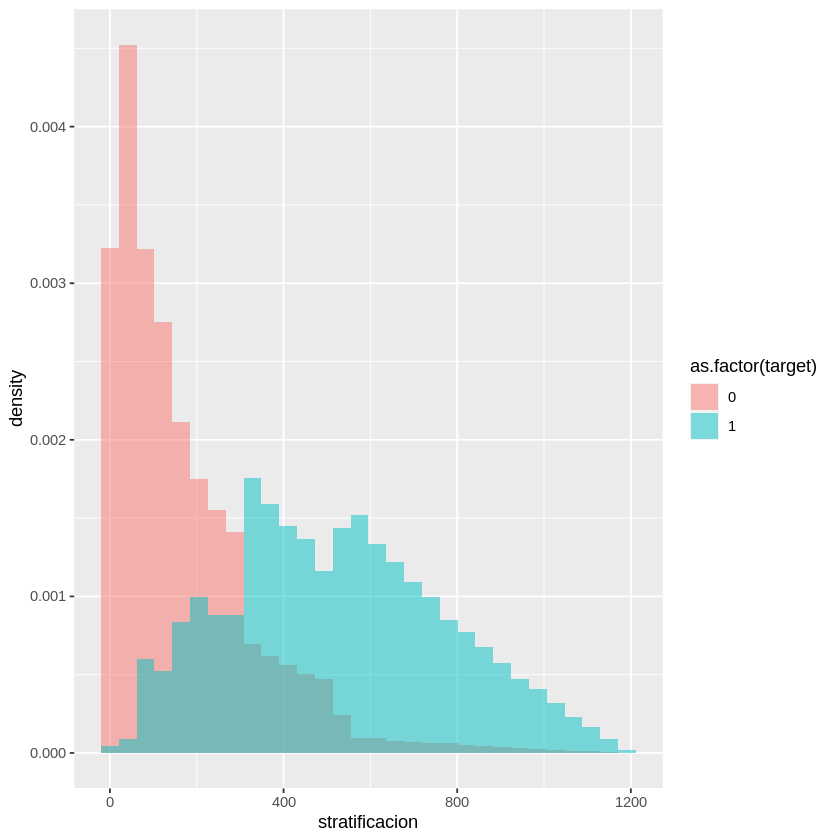

In [ ]:
ggplot(data, aes(stratificacion, fill = as.factor(target))) + 
   geom_histogram(alpha = 0.5, aes(y = ..density..), position = 'identity')

In [ ]:
#make this example reproducible
set.seed(0)

#normalizo 

#split into training (80%) and testing set (20%)
parts = createDataPartition(data$target, p = .7, list = F)
train = data[parts, ]
test = data[-parts, ]

#define predictor and response variables in training set
train_x = data.matrix(train[, c(1,2)])
train_y = train[,5]

#define predictor and response variables in testing set
test_x = data.matrix(test[, c(1,2)])
test_y = test[,5]

#define final training and testing sets
xgb_train = xgb.DMatrix(data = train_x, label = train_y)
xgb_test = xgb.DMatrix(data = test_x, label = test_y)

In [ ]:
#define watchlist
watchlist = list(train=xgb_train, test=xgb_test)

#fit XGBoost model and display training and testing data at each round
model = xgb.train(data = xgb_train, max.depth = 2, watchlist=watchlist, nrounds = 20)




[1]	train-rmse:0.446683	test-rmse:0.447319 
[2]	train-rmse:0.413893	test-rmse:0.415161 
[3]	train-rmse:0.393478	test-rmse:0.395220 
[4]	train-rmse:0.380545	test-rmse:0.382450 
[5]	train-rmse:0.373078	test-rmse:0.375100 
[6]	train-rmse:0.367719	test-rmse:0.369984 
[7]	train-rmse:0.364723	test-rmse:0.367091 
[8]	train-rmse:0.362775	test-rmse:0.365191 
[9]	train-rmse:0.361424	test-rmse:0.363867 
[10]	train-rmse:0.359883	test-rmse:0.362381 
[11]	train-rmse:0.359264	test-rmse:0.361794 
[12]	train-rmse:0.358835	test-rmse:0.361385 
[13]	train-rmse:0.358575	test-rmse:0.361147 
[14]	train-rmse:0.358357	test-rmse:0.360910 
[15]	train-rmse:0.358047	test-rmse:0.360611 
[16]	train-rmse:0.357883	test-rmse:0.360449 
[17]	train-rmse:0.357803	test-rmse:0.360380 
[18]	train-rmse:0.357732	test-rmse:0.360329 
[19]	train-rmse:0.357677	test-rmse:0.360275 
[20]	train-rmse:0.357651	test-rmse:0.360262 


In [ ]:
#install.packages("pROC")
library(pROC)

Setting levels: control = 0, case = 1

Setting direction: controls < cases



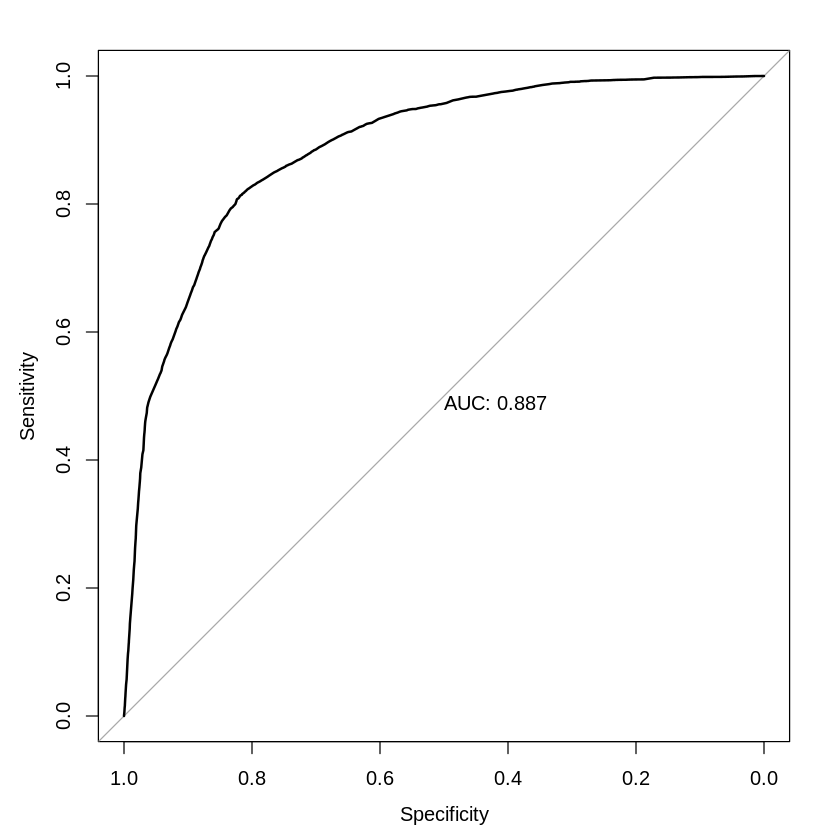

In [ ]:
test_prob_baseline = predict(model, test_x, type = "response")

test_roc_baseline = roc(test_y ~ test_prob_baseline, plot = TRUE, print.auc = TRUE)

Setting levels: control = 0, case = 1

Setting direction: controls < cases



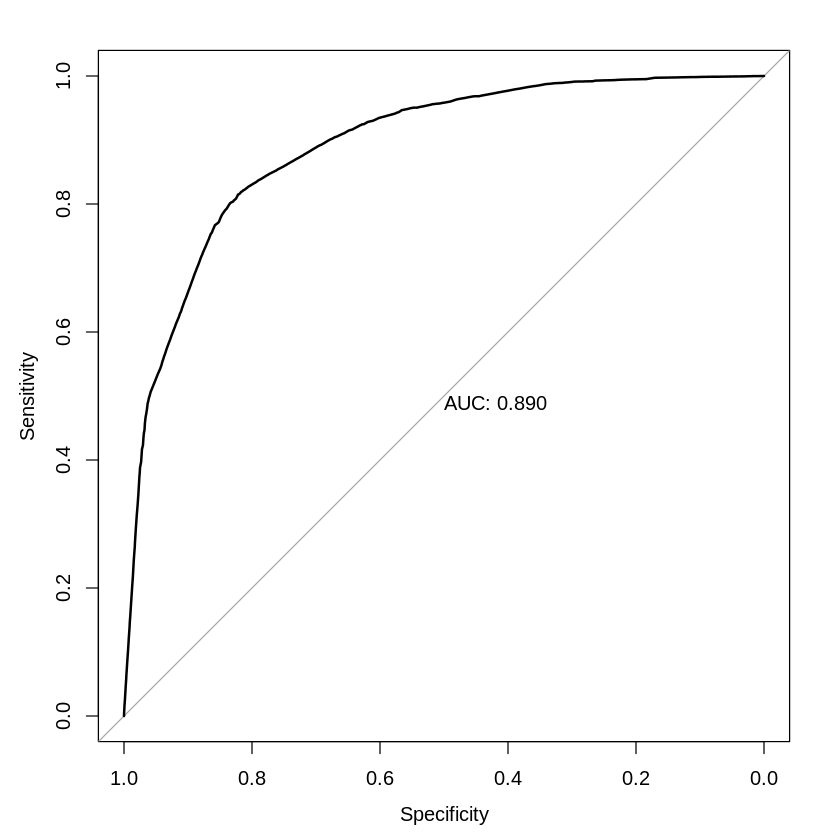

In [ ]:
train_prob = predict(model, train_x, type = "response")

train_roc = roc(train_y ~ train_prob, plot = TRUE, print.auc = TRUE)

In [ ]:
#split into training (80%) and testing set (20%)
test_x=data.frame(uno=test_x[,1], dos=test_x[,2], target=test_y)

porcion = createDataPartition(test_x$uno, p = .6, list = F)
sube = test_x[porcion, ]
mantiene = test_x[-porcion, ]

sube$uno=sube$uno*runif(length(sube$uno),0.2,0.33)

#lo armo, para desarmarlo
test_alterado_1=rbind(sube, mantiene)

porcion = createDataPartition(test_alterado_1$dos, p = .6, list = F)
sube = test_alterado_1[porcion, ]
mantiene = test_alterado_1[-porcion, ]

sube$dos=sube$dos*runif(length(sube$dos),1.5,2.2)

test_alterado=rbind(sube, mantiene)
mean(test_x$uno)
mean(test_alterado$uno)
mean(test_x$dos)
mean(test_alterado$dos)



[1] 1.998411

[1] 1.11707

[1] 150.4739

[1] 227.3188

[1] 45000

Setting levels: control = 0, case = 1

Setting direction: controls < cases



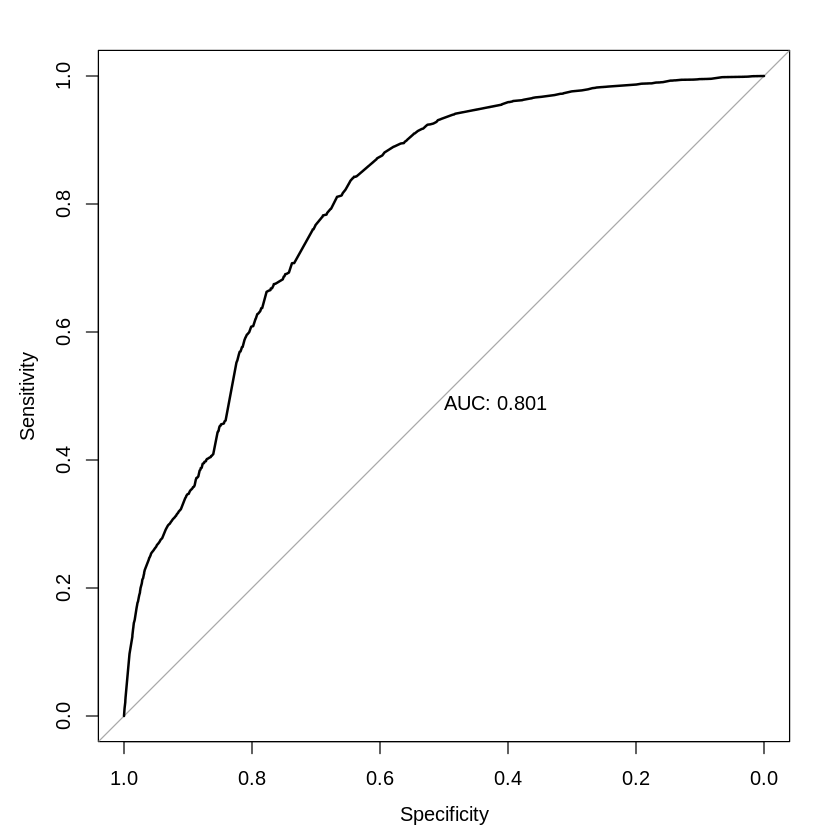

In [ ]:
#define final training and testing sets
alterado_x = data.matrix(test_alterado[,c(1,2)])
alterado_y = test_alterado[,c(3)]



test_prob = predict(model, alterado_x, type = "response")

test_roc = roc(alterado_y ~ test_prob, plot = TRUE, print.auc = TRUE)

In [ ]:
ks.test(test_prob_baseline,test_y)$statistic
ks.test(test_prob,alterado_y)$statistic

Warning message in ks.test.default(test_prob_baseline, test_y):
“p-value will be approximate in the presence of ties”


D 
0.5642

Warning message in ks.test.default(test_prob, alterado_y):
“p-value will be approximate in the presence of ties”


D 
0.5362444

In [ ]:
mean(test_prob_baseline)
mean(test_prob)


[1] 0.3709461

[1] 0.2422845

In [ ]:
decil_baseline=data.frame(prob=test_prob_baseline, target=test_y)
decil_alterado=data.frame(prob=test_prob, target= alterado_y)

decil_baseline= decil_baseline[order(-test_prob_baseline),]
decil_alterado= decil_alterado[order(-test_prob),]

decil_baseline=decil_baseline[c(1:round(nrow(decil_baseline)*.10,0) ), ]
decil_alterado=decil_alterado[c(1:round(nrow(decil_alterado)*.10,0) ), ]

mean(decil_baseline$target)
mean(decil_alterado$target)




[1] 0.898

[1] 0.8108889

[1] 0.8768424

In [ ]:
cut_off=min(decil_baseline$prob)

alterado_corta_cut_off=data.frame(prob=test_prob, target= alterado_y)
alterado_corta_cut_off=alterado_corta_cut_off[alterado_corta_cut_off$prob>cut_off, ]

nrow(alterado_corta_cut_off)
mean(alterado_corta_cut_off$target)

[1] 3487

[1] 0.8353886